In [4]:
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_colwidth', 1000)

In [12]:
df = pd.read_csv('data.csv', encoding="latin-1")

In [13]:
alay = pd.read_csv("new_kamusalay.csv" , encoding="latin-1", header=None)

In [17]:
alay.columns = ['awal','akhir']
alay_dict = dict(zip(alay["awal"], alay["akhir"]))

In [8]:
df[['Tweet','HS']].head(5)

,Tweet,HS
0,- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !',1
1,RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga',0
2,"41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter",0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU',0
4,USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah',1


In [9]:
def hurufkecil(text):
    return text.lower()

def cleaningemoji(text):
    text = re.sub('\w*\d\w*', '', text)
    return text

def cleaningpertama(text):
    text = re.sub(r'\n', '', text)
    text = re.sub('url',' ', text)
    text = re.sub(r'^rt[\s]+', '', text)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub('user',' ', text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ', text)
    text = re.sub('xd',' ', text)
    text = re.sub('  +', ' ', text)
    return text

def cleaningkedua(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

def gantikataalay(text):
    return ' '.join([alay_dict[word] if word in alay_dict else word for word in text.split(' ')])

In [10]:
def semua_fungsi_API1(text):
    text = hurufkecil(text)
    text = cleaningemoji(text)
    text = cleaningpertama(text)
    text = cleaningkedua(text)
    text = gantikataalay(text)
    return text

In [18]:
df.Tweet = df.Tweet.apply(semua_fungsi_API1)

In [22]:
df[['Tweet','HS']].head()

,Tweet,HS
0,di saat semua cowok berusaha melacak perhatian gue kamu lantas remehkan perhatian yang gue kasih khusus ke kamu basic kamu cowok bego,1
1,siapa yang telat memberi tau kamu edan sarap gue bergaul dengan cigax jifla calis sama siapa itu licew juga,0
2,kadang aku berpikir kenapa aku tetap percaya pada tuhan padahal aku selalu jatuh berkali kali kadang aku merasa tuhan itu meninggalkan aku sendirian ketika orang tuaku berencana berpisah ketika kakakku lebih memilih jadi kristen ketika aku anak ter,0
3,aku itu aku dan ku tau matamu sipit tapi dilihat dari mana itu aku,0
4,kaum cebong kafir sudah kelihatan dongoknya dari awal tambah dungu lagi haha,1


### Predict with NN Sklearn

In [38]:
from jcopml.utils import load_model
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"

In [24]:
model = load_model('MLPCPlatinumTfidf0.88%.pkl')

In [26]:
df['Sentiment'] = model.predict(df.Tweet)

In [28]:
df = df[['Tweet','HS','Abusive','Sentiment']]

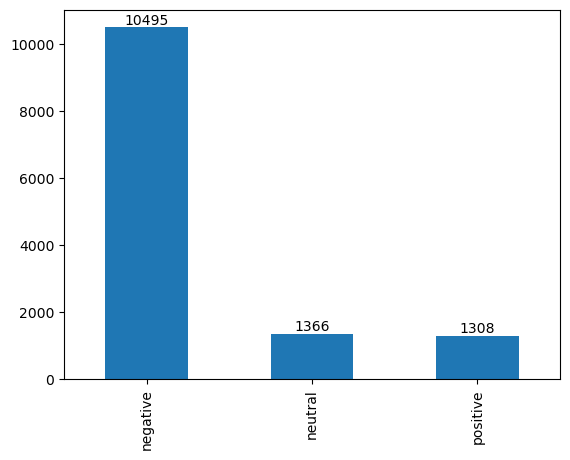

In [36]:
ax = df.Sentiment.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

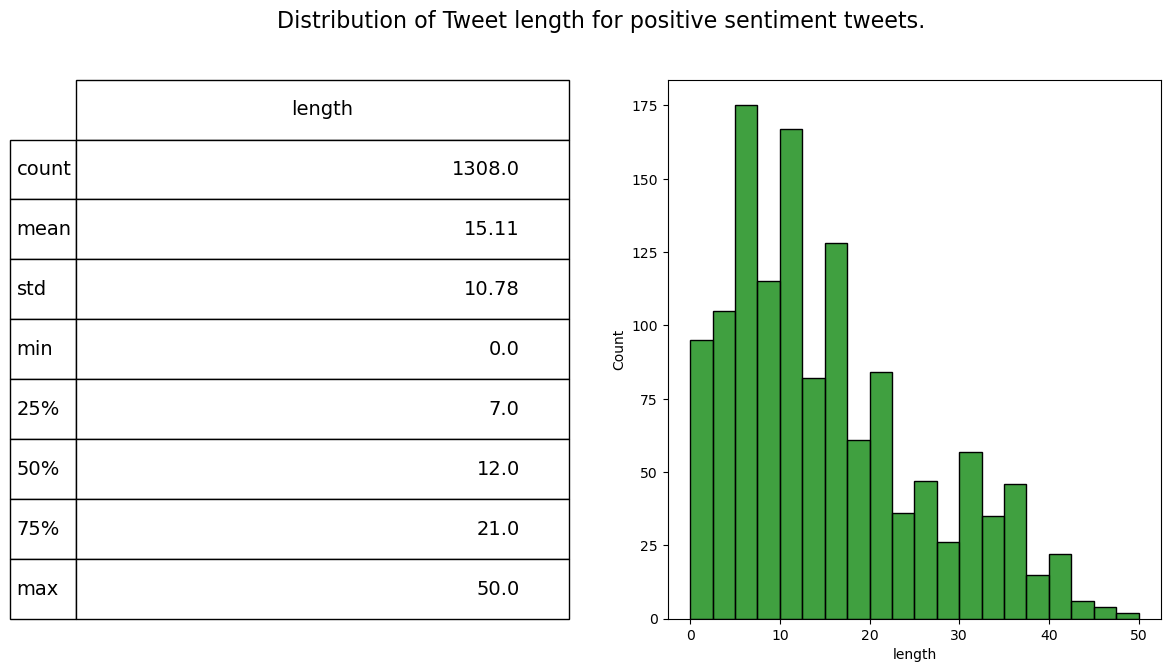

In [43]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Tweet.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['Sentiment']=='positive']['length'], ax=ax1,color='green')
describe = df.length[df.Sentiment=='positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of Tweet length for positive sentiment tweets.', fontsize=16)

plt.show()

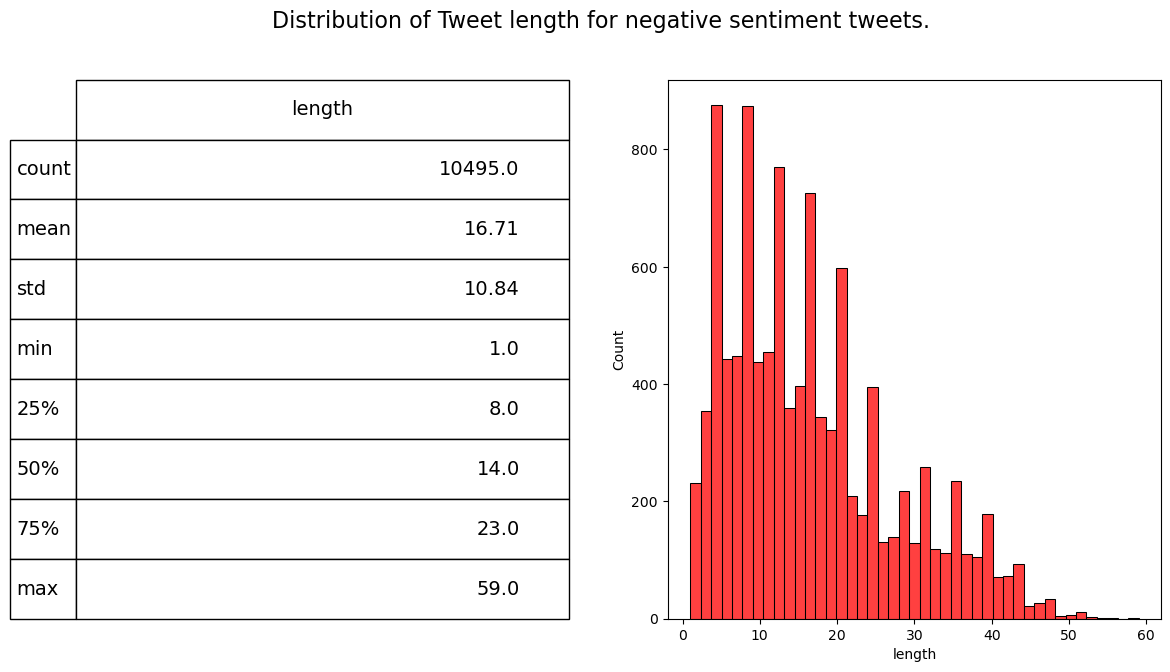

In [44]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Tweet.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['Sentiment']=='negative']['length'], ax=ax1,color='red')
describe = df.length[df.Sentiment=='negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of Tweet length for negative sentiment tweets.', fontsize=16)

plt.show()

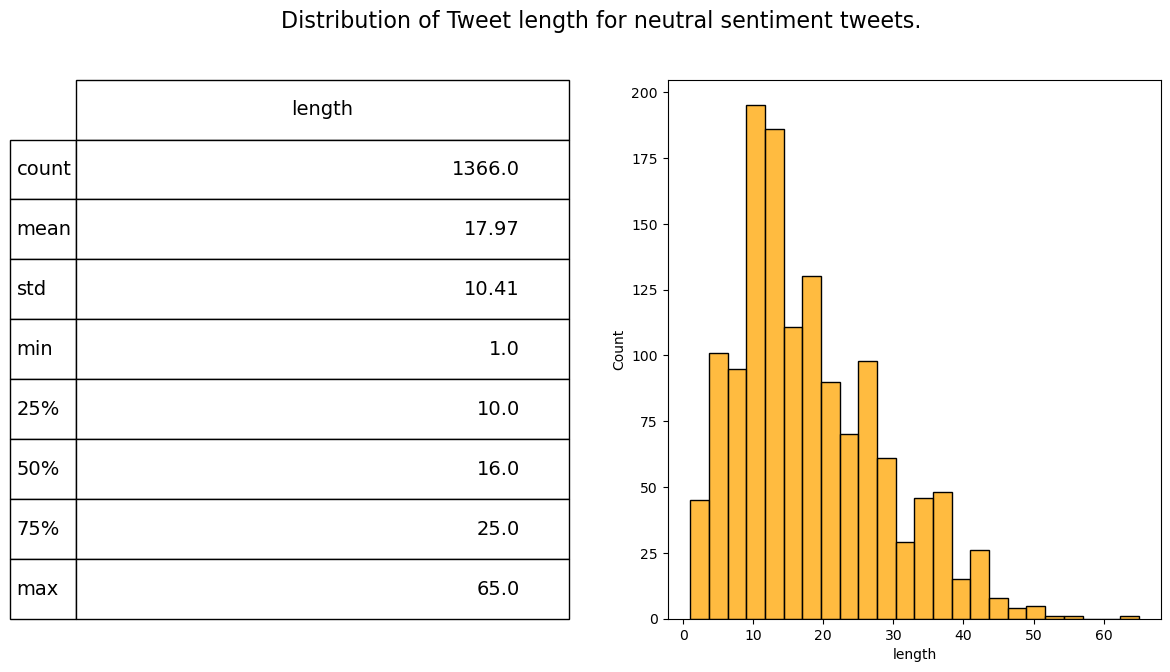

In [47]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Tweet.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['Sentiment']=='neutral']['length'], ax=ax1,color='orange')
describe = df.length[df.Sentiment=='neutral'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of Tweet length for neutral sentiment tweets.', fontsize=16)

plt.show()

### Predict with Bert LanjutEDA dan Testing Model BERT

In [91]:
from data_utils import DocumentSentimentDataset, DocumentSentimentDataLoader
from transformers import BertForSequenceClassification, BertConfig, BertTokenizer
import torch
import tqdm

In [99]:
###
# common functions
###
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    
def count_param(module, trainable=False):
    if trainable:
        return sum(p.numel() for p in module.parameters() if p.requires_grad)
    else:
        return sum(p.numel() for p in module.parameters())
    
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def metrics_to_string(metric_dict):
    string_list = []
    for key, value in metric_dict.items():
        string_list.append('{}:{:.2f}'.format(key, value))
    return ' '.join(string_list)

In [92]:
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
config = BertConfig.from_pretrained("config.json")
config.num_labels = DocumentSentimentDataset.NUM_LABELS

model = BertForSequenceClassification.from_pretrained("pytorch_model.bin", config=config)

w2i, i2w = DocumentSentimentDataset.LABEL2INDEX, DocumentSentimentDataset.INDEX2LABEL

In [93]:
df_bert = df[['Tweet','Sentiment']]

In [94]:
df_bert.columns = df_bert.iloc[1]

In [95]:
df_bert

1,siapa yang telat memberi tau kamu edan sarap gue bergaul dengan cigax jifla calis sama siapa itu licew juga,negative
0,di saat semua cowok berusaha melacak perhatian gue kamu lantas remehkan perhatian yang gue kasih khusus ke kamu basic kamu cowok bego,negative
1,siapa yang telat memberi tau kamu edan sarap gue bergaul dengan cigax jifla calis sama siapa itu licew juga,negative
2,kadang aku berpikir kenapa aku tetap percaya pada tuhan padahal aku selalu jatuh berkali kali kadang aku merasa tuhan itu meninggalkan aku sendirian ketika orang tuaku berencana berpisah ketika kakakku lebih memilih jadi kristen ketika aku anak ter,negative
3,aku itu aku dan ku tau matamu sipit tapi dilihat dari mana itu aku,negative
4,kaum cebong kafir sudah kelihatan dongoknya dari awal tambah dungu lagi haha,negative
...,...,...
13164,jangan asal berbicara ndasmu congor kamu yang anjing,negative
13165,kasur mana enak kunyuk,negative
13166,hati hati bisu tidak dan lagi bosan duh xaa,negative
13167,bom yang real mudah terdeteksi bom yang terkubur suatu saat lebih dahsyat ledakannya itulah di sebut revolusi jiwa,neutral


In [96]:
df_bert.to_csv('df_bert.tsv', sep='\t', index=False)

### Lanjutan di EDA dan Testing Model BERT